In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
%matplotlib inline

## Describe DataSet
I am interested inthis data set because of the nature of the data, World Suicide Statistics, and because it is provided by the World Health Organization, WHO. Unfortunately, the data seems to be just a subset of a bigger data set and focuses only on countries, population, and number of suicides. It would have been interesting if the data set would contain more detail information. However, for the purpose of the report, it provides sufficient information to analyze and get feed back.

The data set contains basic information on the number of suices from 1980 - 2016 by country, year, and demographic group.

In [2]:
suicide_data = pd.read_csv('D:\\My Data 2\\dev\\Python\\Thinkful\\Unit 4\\who_suicide_statistics.csv')

In [3]:
np.random.seed(53)
obs, feat = suicide_data.shape
suicide_data.sample(5)

,country,year,sex,age,suicides_no,population
36847,Spain,1999,male,25-34 years,368.0,3349113.0
27489,New Zealand,2012,male,5-14 years,7.0,297240.0
41545,United Kingdom,1986,female,25-34 years,161.0,3980652.0
18746,Iceland,1987,female,35-54 years,2.0,26200.0
38569,Syrian Arab Republic,1985,female,25-34 years,0.0,NaN


In [4]:
print(str("Dataset consist of " + str(obs) + " observations and " + str(feat) + " features. Features are following:"))

Dataset consist of 43776 observations and 6 features. Features are following:


In [5]:
suicide_data.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

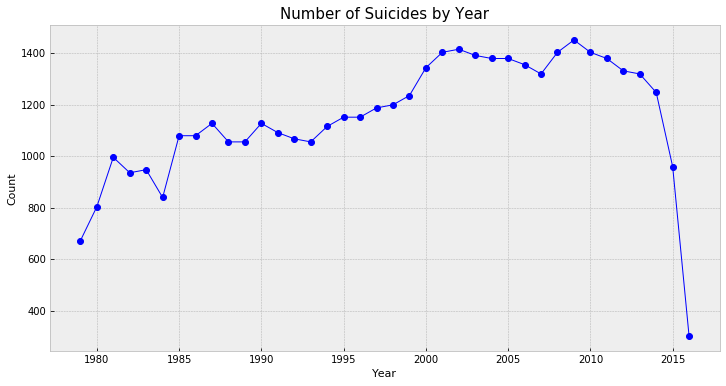

In [6]:
temp1 = suicide_data.groupby(suicide_data.year)[['year']].count()
temp1 = temp1.rename(columns={"year": "Count"})

plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.plot(temp1.index, 'Count', data=temp1, color='blue', marker='o', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Number of Suicides by Year', loc='center', fontsize=15)
plt.show()

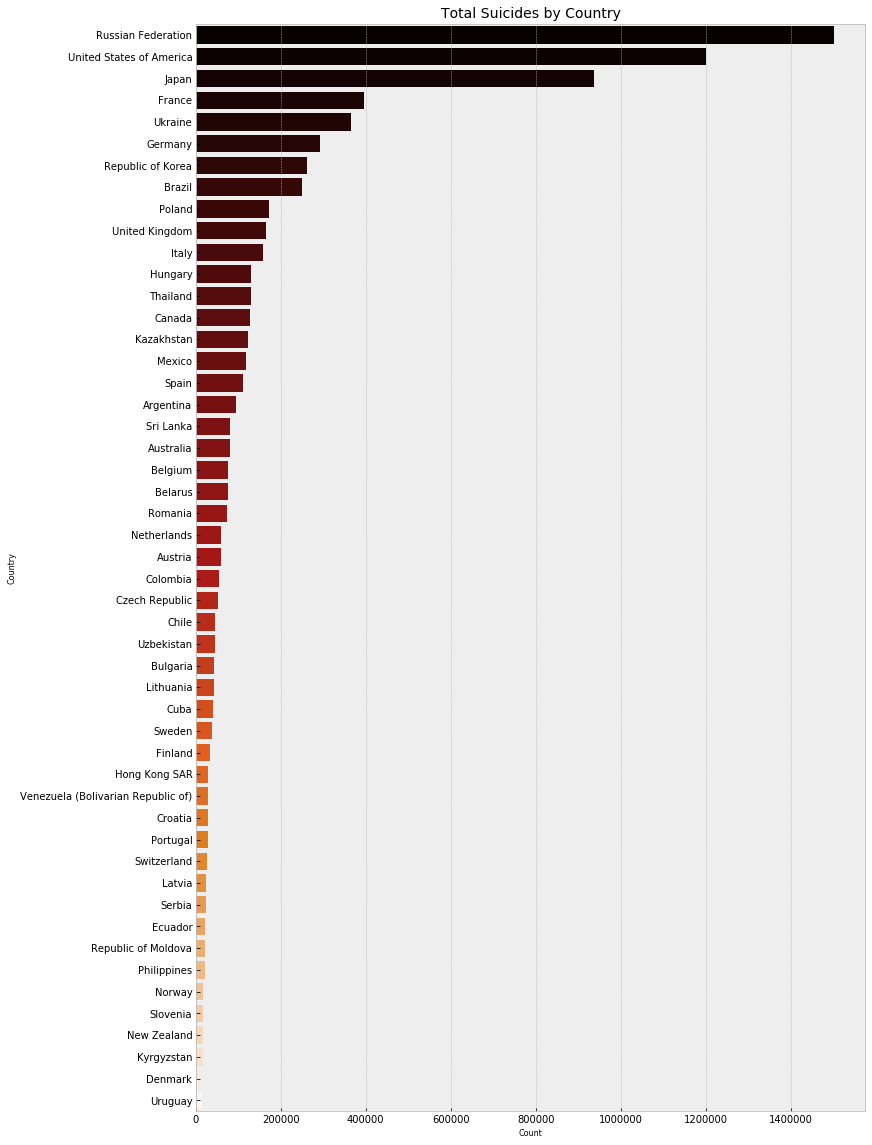

In [7]:
temp2 = suicide_data.groupby(suicide_data.country)[['suicides_no']].sum()
temp2 = temp2.rename(columns={"suicides_no": "Count"})
temp2 = temp2.sort_values(by='Count', ascending=False)
temp2_top = temp2.head(50)

plt.figure(figsize=(12, 20))
sns.barplot(y=temp2_top.index, x='Count', data=temp2_top, palette='gist_heat', orient='h')
plt.xlabel('Count', fontsize=8)
plt.ylabel('Country', fontsize=8)
plt.title('Total Suicides by Country', loc='center', fontsize=14)
plt.show()

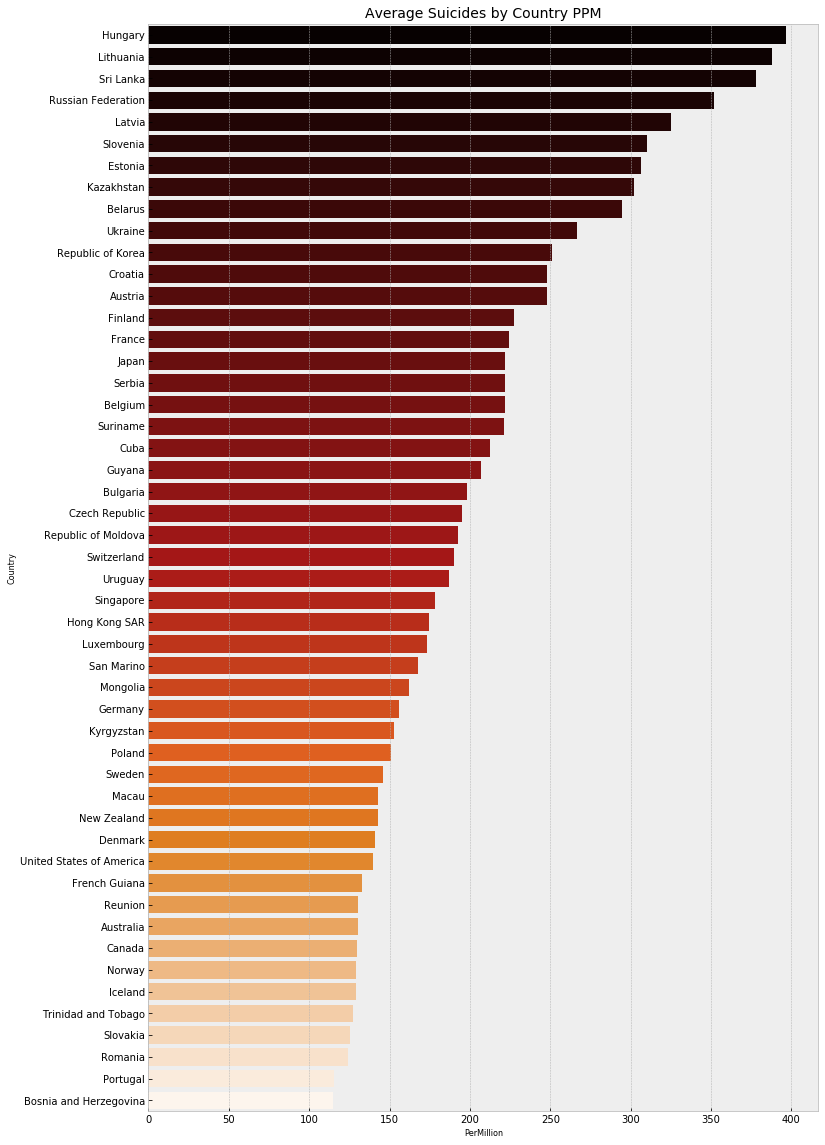

In [8]:
temp3 = suicide_data.copy()
temp3['ppm'] = suicide_data.suicides_no / suicide_data.population * 1000000
temp4 = temp3.groupby(suicide_data.country)[['ppm']].mean()

temp4 = temp4.sort_values(by='ppm', ascending=False)
temp4_top = temp4.head(50)

plt.figure(figsize=(12, 20))
sns.barplot(y=temp4_top.index, x='ppm', data=temp4_top, palette='gist_heat', orient='h')
plt.xlabel('PerMillion', fontsize=8)
plt.ylabel('Country', fontsize=8)
plt.title('Average Suicides by Country PPM', loc='center', fontsize=14)
plt.show()

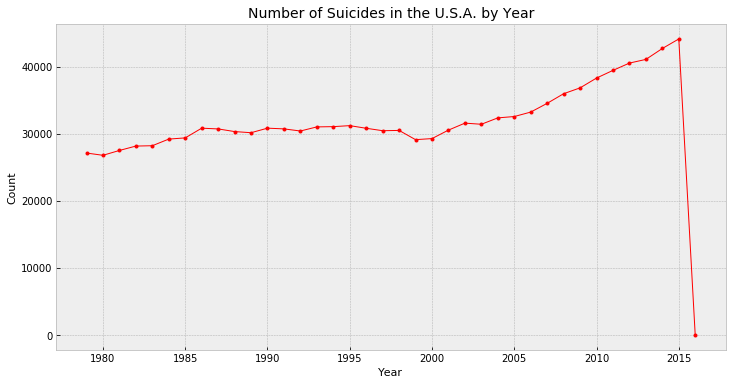

In [72]:
# Suicides in the U.S.
us_data = suicide_data[suicide_data.country == 'United States of America']

Count_by_Year = us_data.groupby(us_data.year)[['suicides_no']].sum()
Count_by_Year = Count_by_Year.rename(columns={"suicides_no": "Count"})
#print(Count_by_Year)

plt.figure(figsize=(12,6))
plt.plot(Count_by_Year.index, 'Count', data=Count_by_Year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Number of Suicides in the U.S.A. by Year', loc='Center', fontsize=14)
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


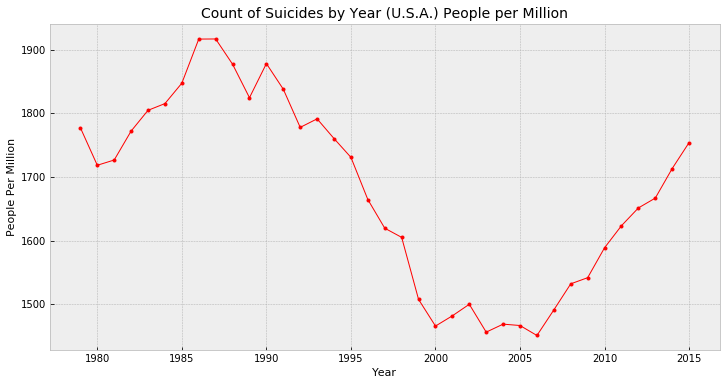

In [73]:
# Suicides PPM U.S.A. only
us_data['ppm'] = us_data.suicides_no / us_data.population * 1000000
#print(us_data)

# I need to remove those rows with no PPM values
# First I replace the empties with "NaN"
us_data['ppm'].replace('', np.nan, inplace=True)
# Now I drop the rows with PPM = "NaN"
us_data.dropna(subset=['ppm'], inplace=True)

PPM_by_Year = us_data.groupby(us_data.year)[['ppm']].sum()
PPM_by_Year = PPM_by_Year.rename(columns={"ppm": "Count"})
#print(PPM_by_Year)

plt.figure(figsize=(12, 6))
plt.plot(PPM_by_Year.index, 'Count', data=PPM_by_Year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('People Per Million', fontsize=11)
plt.title('Count of Suicides by Year (U.S.A.) People per Million', loc='Center', fontsize=14)
plt.show()

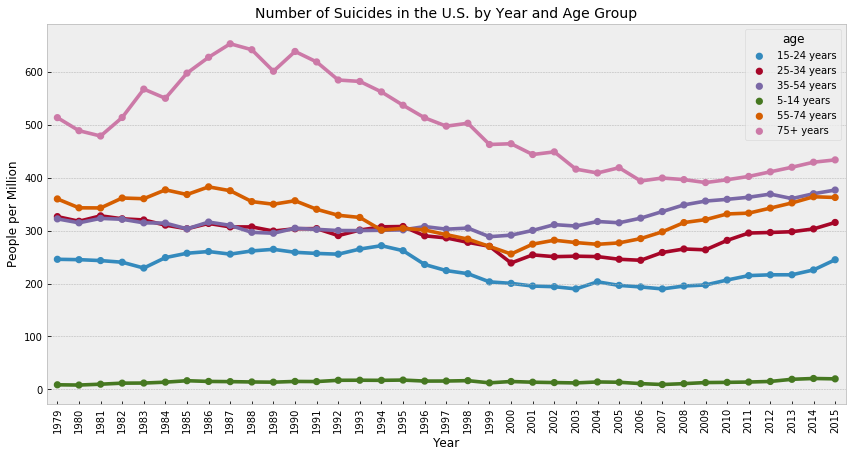

In [74]:
# Suicides PPM U.S.A. only
#print(us_data)
temp_us_data = us_data.copy()

plt.figure(figsize=(12, 6))

sns.pointplot(data = temp_us_data.groupby(['year', 'age'])[['ppm']].sum().reset_index(), 
              markers='.', linewidth=1, x='year', y='ppm', hue='age')

plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Number of Suicides in the U.S. by Year and Age Group", loc='Center', fontsize=14)
plt.xlabel("Year")
plt.ylabel("People per Million")
plt.show()

By looking at the graph above, we can see the gradual drop in suicides for those 75 years old and older.  We can see almost the same effect, but at a lighter capacity for those 55 to 74. Although there is no data available in our DataSet to support it, I would like to suggest the decrease is due to the improved quality of life the elders have available today.

The number of suicdes among those 14 years and younger, seems to remain unchanged. However for the age group of 25 to 34, the number of suicides seems to be increasing.

## Propose further research
It is really saddening that this type of events occurs more frequently in our society and that our society is not aware. Through this report we have left questions a number of questions that need answers.  In addition to providing answers to the questions, it would be a challenge to be able to determine the effect economy has in the number of suicides as well as the possible socio-economic factors, such as income level, education, etc, have on the number of suicides. In order to further research these, a larger data set cover various economic resetions will be nesscesary as well as additional detail describing existing social and economic factor on individuals.